# Plot Change of Climatological Temperature


An NOAA dataset has been stored in the file `BinnedCsvs_d400.csv`. The data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the datafile corresponds to a single observation.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)


The data is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(hashid):

    df = pd.read_csv('BinSize_d400.csv')

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

/home/adrian/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('BinnedCsvs_d400.csv')


#organizate in year and month
df['MonthDay'] = df['Date'].map(lambda x: x[5:])


#remove leap days
df['Date'] =pd.to_datetime(df.Date)
df = df.sort_values(by='Date')
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

#correct °C
df['Data_Value'] = df['Data_Value']/10




#get min
dfmin = df[(df['Element'] == 'TMIN') & (df['Date'].dt.year < 2015)][['Date', 'Data_Value', 'MonthDay']]
dfmin = dfmin.groupby(['MonthDay']).mean()


#get max
dfmax = df[(df['Element'] == 'TMAX') & (df['Date'].dt.year < 2015)][['Date', 'Data_Value', 'MonthDay']]
dfmax = dfmax.groupby(['MonthDay']).mean()


#get 2015 min
df2015min = df[(df['Element'] == 'TMIN') & (df['Date'].dt.year == 2015)][['Date', 'Data_Value', 'MonthDay']]
df2015min = df2015min.groupby(['MonthDay']).mean()


#get 2015 max
df2015max = df[(df['Element'] == 'TMAX') & (df['Date'].dt.year == 2015)][['Date', 'Data_Value', 'MonthDay']]
df2015max = df2015max.groupby(['MonthDay']).mean()

#for scatter
scmin = np.where(df2015min['Data_Value'] < dfmin['Data_Value'])
scmax = np.where(df2015max['Data_Value'] > dfmax['Data_Value'])


In [3]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


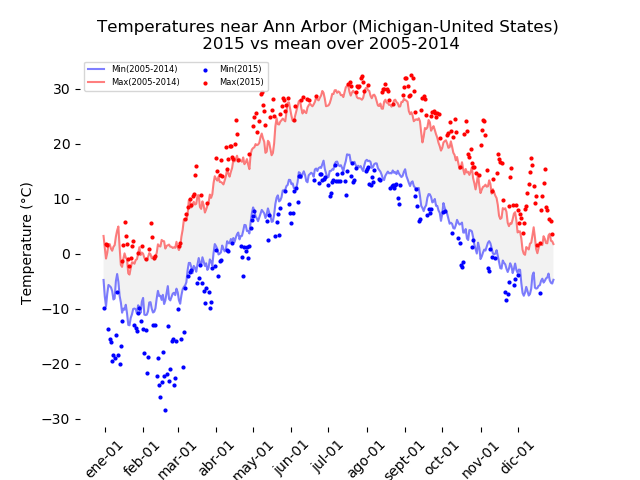

In [4]:
plt.figure()

plt.plot(dfmin.values, 'b', alpha = 0.50)
plt.plot(dfmax.values, 'r', alpha = 0.50)
plt.scatter(scmin, df2015min.iloc[scmin], s = 4, c = 'b')
plt.scatter(scmax, df2015max.iloc[scmax], s = 4, c = 'r')

# fill
plt.gca().fill_between(range(0, 365),dfmin.Data_Value, dfmax.Data_Value, facecolor = 'grey', alpha = 0.1)


plt.xticks((1,32,60,91,121,152,182,213,244,274,305,335), ('ene-01','feb-01','mar-01','abr-01','may-01','jun-01','jul-01',
                                                          'ago-01','sept-01','oct-01','nov-01','dic-01'), rotation = '45')


#label
plt.title('Temperatures near Ann Arbor (Michigan-United States)\n 2015 vs mean over 2005-2014')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.legend(['Min(2005-2014)', 'Max(2005-2014)', 'Min(2015)', 'Max(2015)'], loc = 0, ncol = 2, fontsize=6)


# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    